<a href="https://colab.research.google.com/github/visith1577/Deep-learning/blob/main/music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import librosa.display

In [2]:
debussy = '/content/8- Implementing the amplitude envelope_audio_debussy.wav'

In [3]:
import IPython.display as ipd

In [4]:
ipd.Audio(debussy)

In [5]:
duke = '/content/8- Implementing the amplitude envelope_audio_duke.wav'
reddot = '/content/8- Implementing the amplitude envelope_audio_redhot.wav'

In [6]:
debussy, sr = librosa.load(debussy)
reddot, _ = librosa.load(reddot)
duke, _ = librosa.load(duke)

In [7]:
debussy.size

661500

In [8]:
# duration of 1 sample
sample_duration = 1 / sr
print(f"duration of one sample {sample_duration: .6f}")

duration of one sample  0.000045


In [9]:
import matplotlib.pyplot as plt

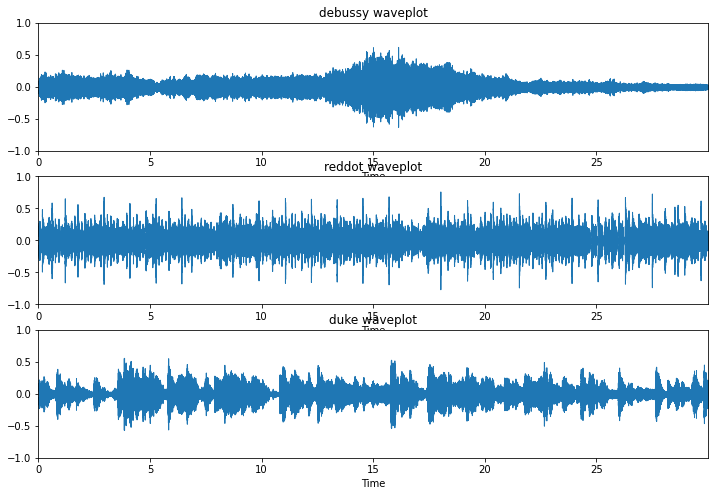

In [10]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)

librosa.display.waveplot(debussy)
plt.title("debussy waveplot")
plt.ylim(-1, 1)

plt.subplot(3, 1, 2)

librosa.display.waveplot(reddot)
plt.title("reddot waveplot")
plt.ylim(-1, 1)

plt.subplot(3, 1, 3)

librosa.display.waveplot(duke)
plt.title("duke waveplot")
plt.ylim(-1, 1)

plt.show();

In [11]:
import numpy as np

In [12]:
FRAME_SIZE = 1024

def amplitude_envelop(signal, frame_size):
  amplitude_envelop = []

  for i in range(0, len(signal), frame_size):
    current_frame_amplitude_envelop = max(signal[i:i+frame_size])
    amplitude_envelop.append(current_frame_amplitude_envelop)

  return np.array(amplitude_envelop) 

In [13]:
ae_debussy = amplitude_envelop(debussy, FRAME_SIZE)
len(ae_debussy)

646

In [14]:
def amp_envelop(signal, frame_size=1024, hop_lenght=512):
  return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_lenght)])

In [15]:
obj = amp_envelop(debussy)
ae_debussy = amp_envelop(debussy)
ae_reddot = amp_envelop(reddot)
ae_duke = amp_envelop(duke)

In [16]:
len(obj)

1292

In [17]:
rms_debussy = librosa.feature.rms(debussy, frame_length=FRAME_SIZE, hop_length=512)[0]
rms_reddot = librosa.feature.rms(reddot, frame_length=FRAME_SIZE, hop_length=512)[0]
rms_duke = librosa.feature.rms(duke, frame_length=FRAME_SIZE, hop_length=512)[0]

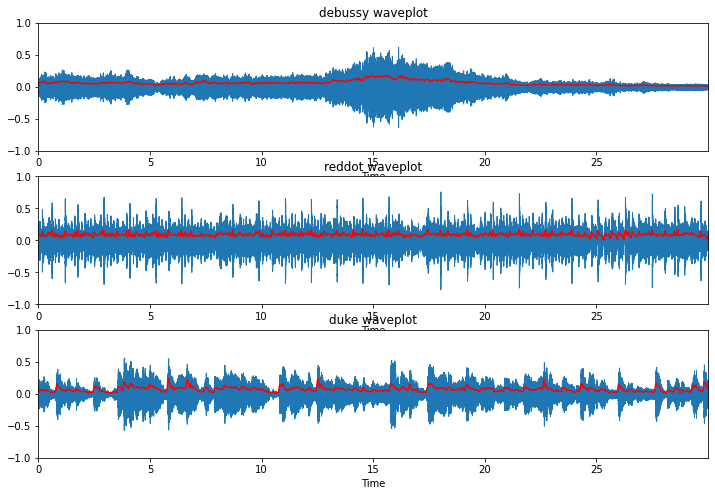

In [18]:
# plot rmse
frames = range(len(obj))
t = librosa.frames_to_time(frames, hop_length=512)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)

librosa.display.waveplot(debussy)
plt.title("debussy waveplot")
plt.plot(t, rms_debussy, color='r')
plt.ylim(-1, 1)

plt.subplot(3, 1, 2)

librosa.display.waveplot(reddot)
plt.title("reddot waveplot")
plt.plot(t, rms_reddot, color='r')
plt.ylim(-1, 1)

plt.subplot(3, 1, 3)

librosa.display.waveplot(duke)
plt.title("duke waveplot")
plt.plot(t, rms_duke, color='r')
plt.ylim(-1, 1)

plt.show();

In [19]:
zcr_debussy = librosa.feature.zero_crossing_rate(debussy, frame_length=FRAME_SIZE, hop_length=512)[0]
zcr_reddot = librosa.feature.zero_crossing_rate(reddot, frame_length=FRAME_SIZE, hop_length=512)[0]
zcr_duke = librosa.feature.zero_crossing_rate(duke, frame_length=FRAME_SIZE, hop_length=512)[0]

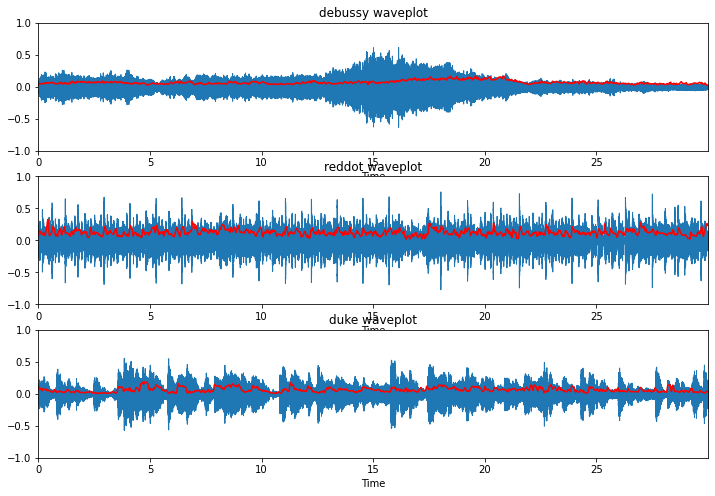

In [20]:
# plot zero crossing rate
frames = range(len(obj))
t = librosa.frames_to_time(frames, hop_length=512)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)

librosa.display.waveplot(debussy)
plt.title("debussy waveplot")
plt.plot(t, zcr_debussy, color='r')
plt.ylim(-1, 1)

plt.subplot(3, 1, 2)

librosa.display.waveplot(reddot)
plt.title("reddot waveplot")
plt.plot(t, zcr_reddot, color='r')
plt.ylim(-1, 1)

plt.subplot(3, 1, 3)

librosa.display.waveplot(duke)
plt.title("duke waveplot")
plt.plot(t, zcr_duke, color='r')
plt.ylim(-1, 1)

plt.show();

In [21]:
import scipy as sp

In [22]:
ft = sp.fft.fft(debussy)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

In [23]:
ft

array([7847.4834   -0.j      ,  -17.714111+14.62047j ,
         10.253906+21.396524j, ...,   -8.968164+55.21076j ,
         10.253906-21.396524j,  -17.714111-14.62047j ], dtype=complex64)

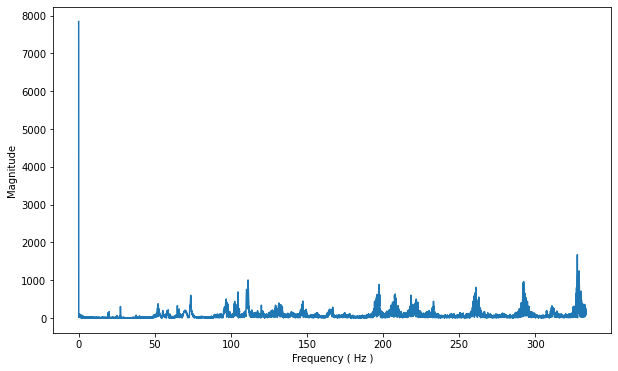

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(frequency[:10000], magnitude[:10000])
plt.xlabel("Frequency ( Hz )")
plt.ylabel("Magnitude")
plt.show()

In [25]:
d = 1/sr

In [26]:
sax = '/content/14- Extracting the Discrete Fourier Transform_audio_sax.wav'
violin = '/content/14- Extracting the Discrete Fourier Transform_audio_violin_c.wav'

In [27]:
noise = '/content/noise.wav'

In [28]:
violin, sr  = librosa.load(violin)
sax, _ = librosa.load(sax)
noise, _ = librosa.load(noise)

In [29]:
violin_ft = sp.fft.fft(violin)

In [30]:
violin_ft.shape

(59772,)

In [31]:
def plot_fourier_transforms(signal, title, sr):
  ft = sp.fft.fft(signal)
  magnitude = np.abs(ft)

  plt.figure(figsize=(12, 8))
  frequency = np.linspace(0, sr, len(magnitude))
  plt.plot(frequency, magnitude)
  plt.xlabel("Frequency (Hz)")
  plt.title(title)
  
  plt.show();

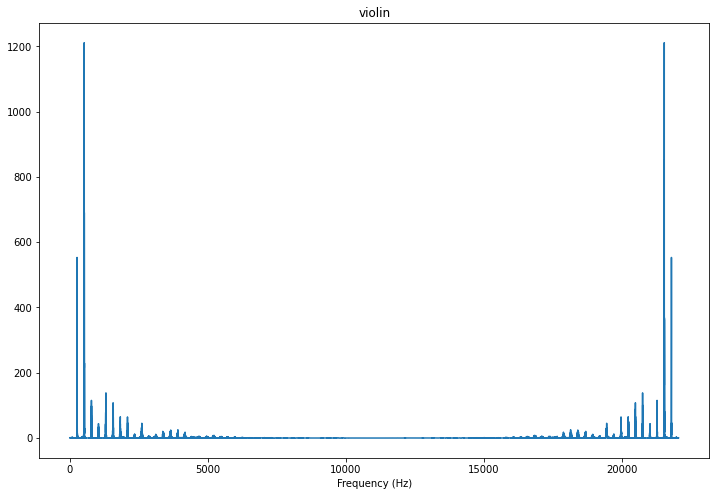

In [32]:
plot_fourier_transforms(violin, "violin", sr)

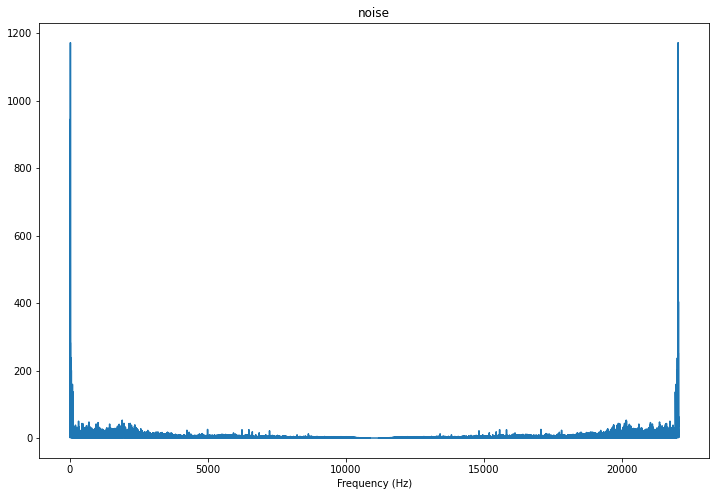

In [33]:
plot_fourier_transforms(noise, "noise", sr)

In [34]:
s_scale = librosa.stft(debussy, n_fft=2048, hop_length=512)

In [35]:
s_scale.shape

(1025, 1292)

In [36]:
s_scale[0][0]

(7.689472+0j)

In [37]:
y_scale = np.abs(s_scale)**2

In [38]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
  plt.figure(figsize=(25, 10))
  librosa.display.specshow(Y,
                           sr=sr,
                           hop_length=hop_length,
                           x_axis='time',
                           y_axis=y_axis
                           )
  plt.colorbar(format="%+2.f")

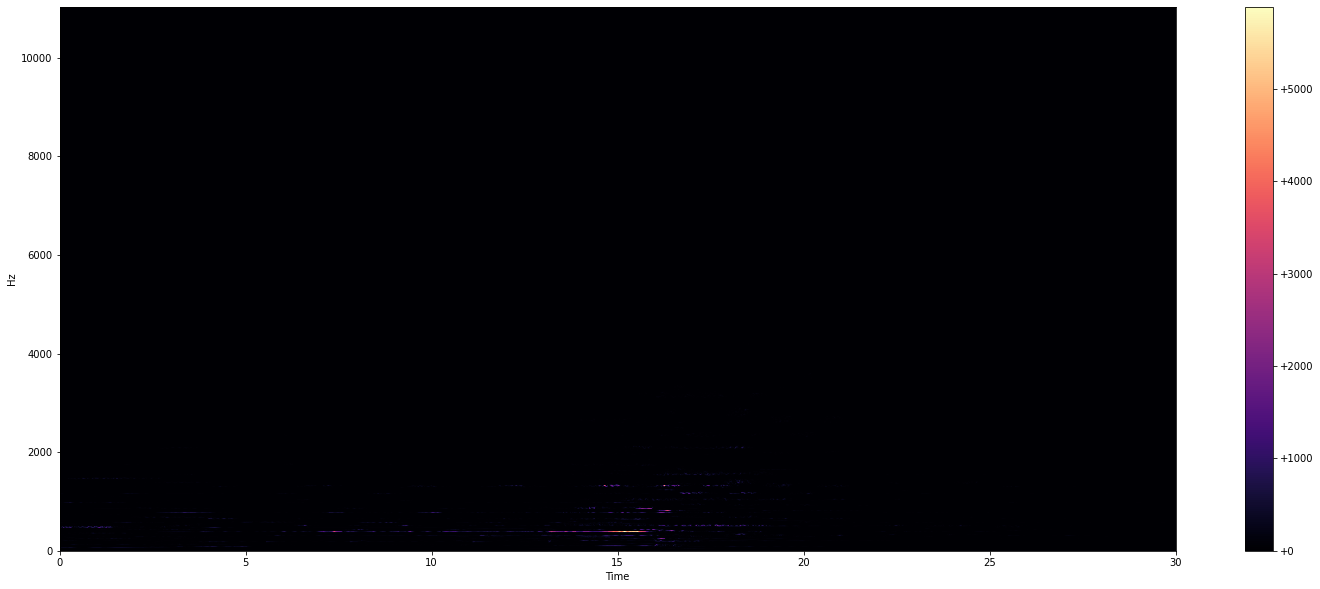

In [39]:
plot_spectrogram(y_scale, sr, 512)

In [40]:
y_log_scale = librosa.power_to_db(y_scale)

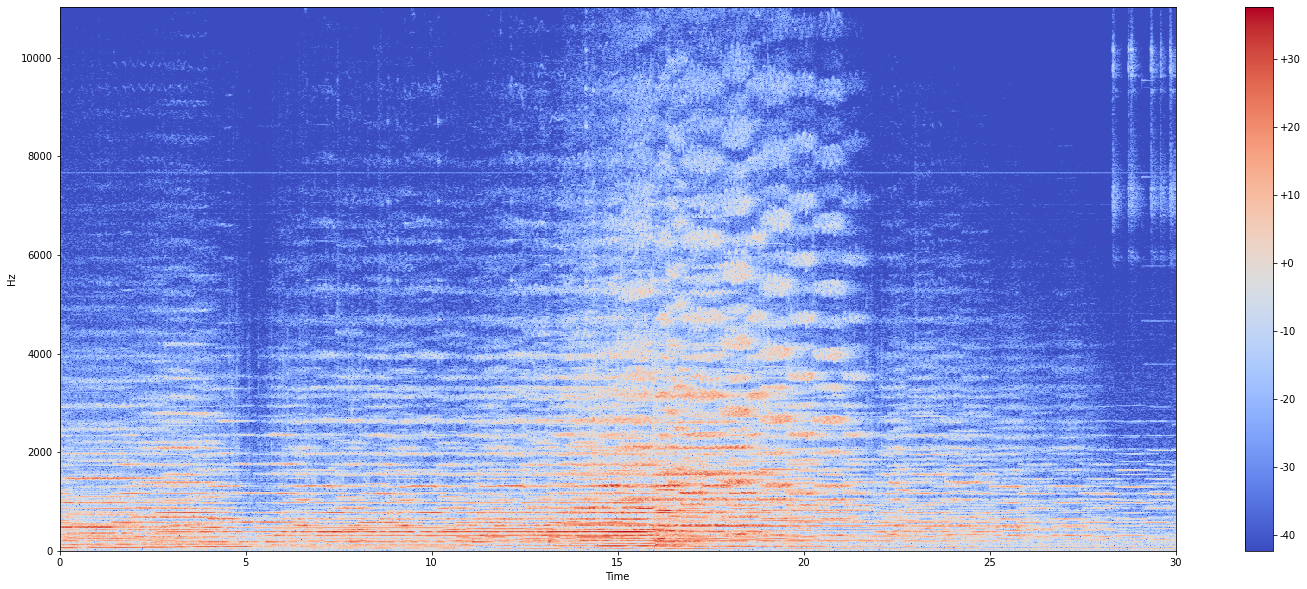

In [41]:
plot_spectrogram(y_log_scale, sr, 512)

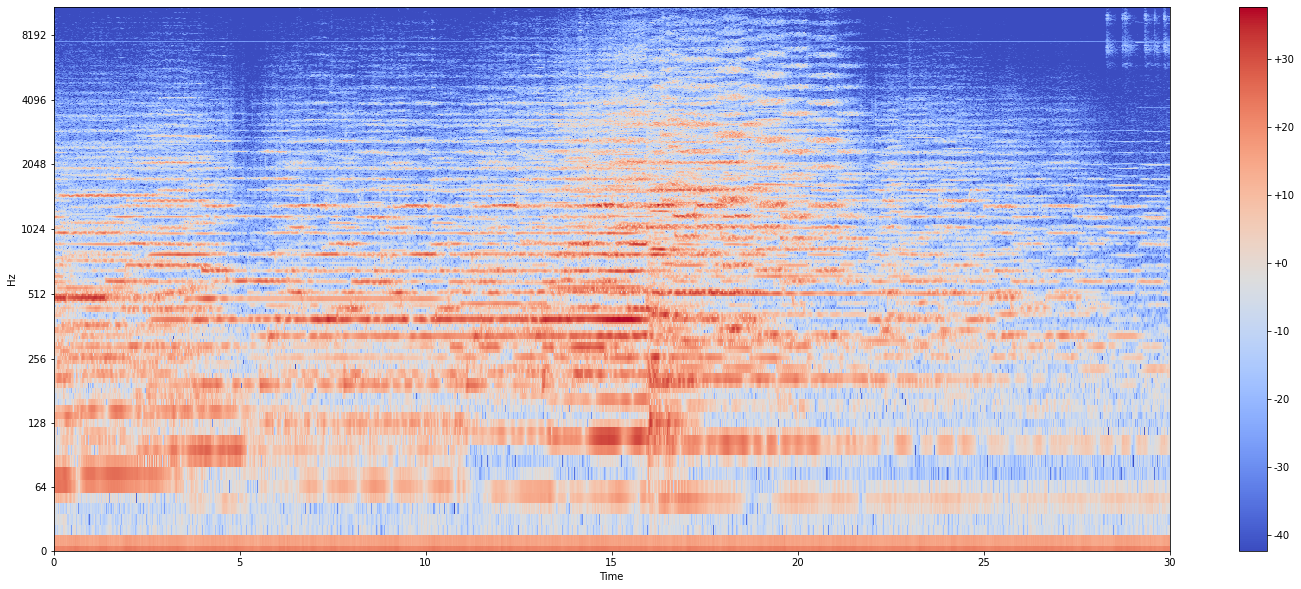

In [42]:
plot_spectrogram(y_log_scale, sr, 512, y_axis='log')

In [43]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)

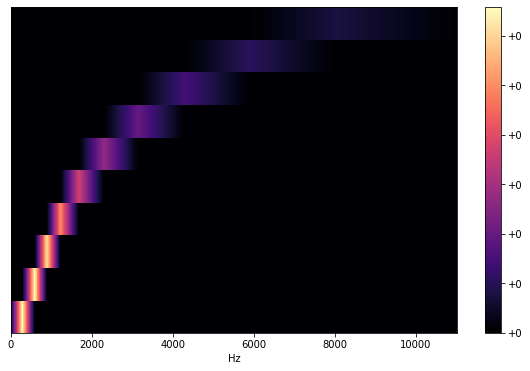

In [44]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(
    filter_banks,
    sr=sr,
    x_axis="linear"
)
plt.colorbar(format="%+2.f")
plt.show();

In [45]:
mel_spectrogram = librosa.feature.melspectrogram(debussy, sr=sr, n_fft=2048, n_mels=90)

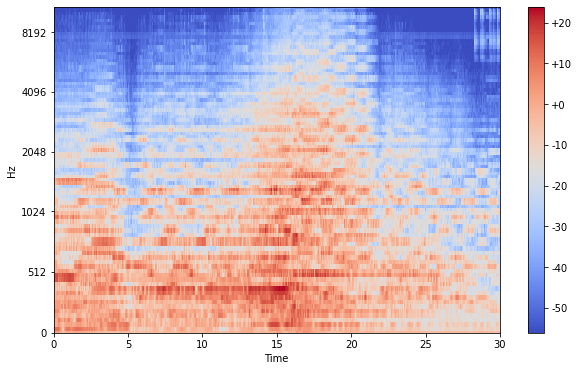

In [46]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(10, 6))
librosa.display.specshow(
    log_mel_spectrogram,
    sr=sr,
    x_axis="time",
    y_axis="mel"
)
plt.colorbar(format="%+2.f")
plt.show();

In [47]:
mfcc = librosa.feature.mfcc(debussy, sr, n_mfcc=13)

In [48]:
mfcc.shape

(13, 1292)

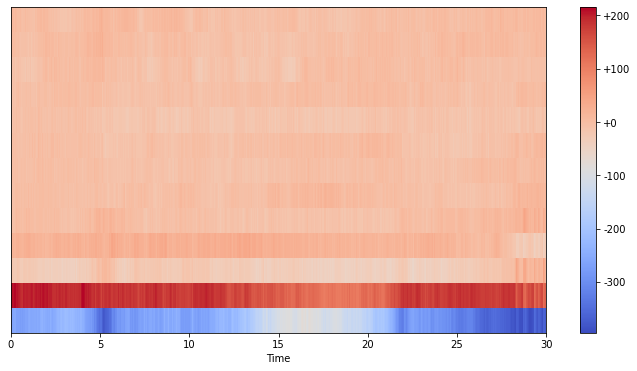

In [49]:
plt.figure(figsize=(12, 6))
librosa.display.specshow(
    mfcc,
    x_axis="time",
    sr=sr
)
plt.colorbar(format="%+2.f")
plt.show();

In [50]:
delta_mfccs = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, delta=2)

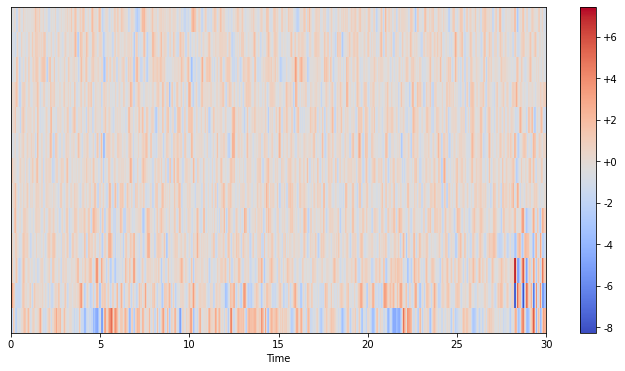

In [51]:
plt.figure(figsize=(12, 6))
librosa.display.specshow(
    delta_mfccs,
    x_axis="time",
    sr=sr
)
plt.colorbar(format="%+2.f")
plt.show();

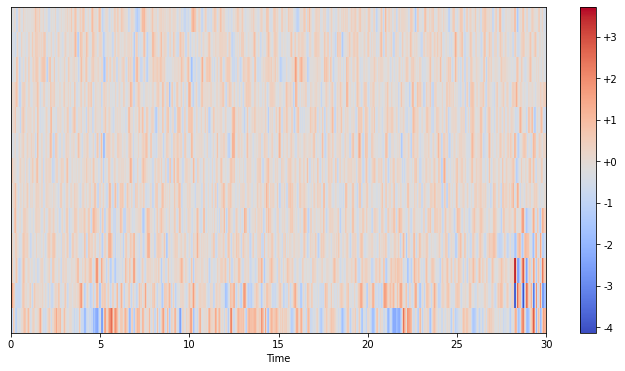

In [52]:
plt.figure(figsize=(12, 6))
librosa.display.specshow(
    delta2_mfcc,
    x_axis="time",
    sr=sr
)
plt.colorbar(format="%+2.f")
plt.show();

In [53]:
comprehensive_mfccs = np.concatenate((mfcc, delta_mfccs, delta2_mfcc))

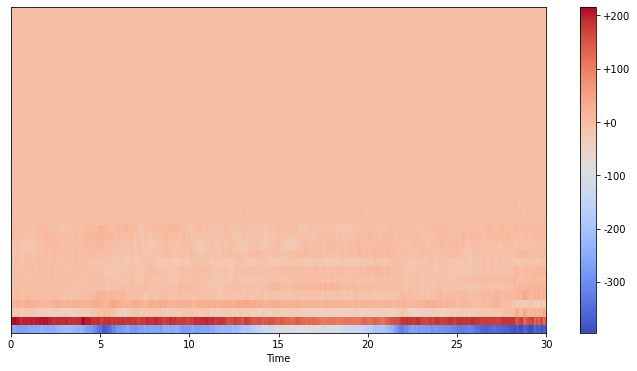

In [54]:
plt.figure(figsize=(12, 6))
librosa.display.specshow(
    comprehensive_mfccs,
    x_axis="time",
    sr=sr
)
plt.colorbar(format="%+2.f")
plt.show();

In [55]:
debusy_stft = librosa.stft(debussy, n_fft=2048, hop_length=512)
reddot_stft = librosa.stft(reddot, n_fft=2048, hop_length=512)

In [57]:
sc_reddot = librosa.feature.spectral_centroid(debussy, sr, n_fft=2048, hop_length=512)[0]

In [59]:
frames = range(len(sc_reddot))

In [60]:
t = librosa.frames_to_time(frames)

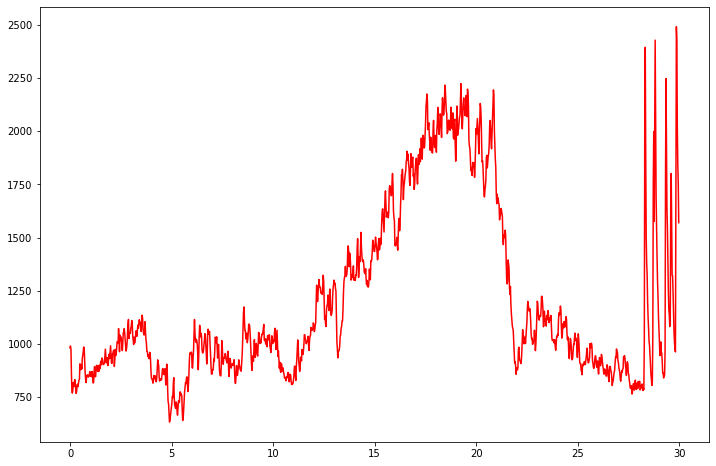

In [61]:
plt.figure(figsize=(12, 8))
plt.plot(t, sc_reddot, color='r')
plt.show();